# Installations

In [1]:
!pip install nltk spacy emoji

In [2]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 4.6 MB/s eta 0:00:03
     ---- ----------------------------------- 1.3/12.8 MB 3.2 MB/s eta 0:00:04
     ----- ---------------------------------- 1.8/12.8 MB 3.4 MB/s eta 0:00:04
     ------- -------------------------------- 2.4/12.8 MB 3.1 MB/s eta 0:00:04
     --------- ------------------------------ 3.1/12.8 MB 3.2 MB/s eta 0:00:04
     ------------ --------------------------- 3.9/12.8 MB 3.3 MB/s eta 0:00:03
     -------------- ------------------------- 4.7/12.8 MB 3.3 MB/s eta 0:00:03
     ---------------- ----------------------- 5.2/12.8 MB 3.3 MB/s eta 0:00:03
     ------------------- -------------------- 6.3/12.8 MB 3.4 MB/s eta 0:00:02
     --------------------- ------------------ 6.8/12.8 MB 3.4 MB/s eta 0:00:02
     ----------------------- ---------------- 7.6/12.8 MB 3.4 MB/s

In [3]:
pip install sentencepiece nltk

Note: you may need to restart the kernel to use updated packages.


# Commit to GitHub

In [4]:
!pwd                # shows your current folder
!git status         # check uncommitted changes
!git add .
!git commit -m "Data text Preprocessing and cleaning"
!git push origin main

'pwd' is not recognized as an internal or external command,
operable program or batch file.


On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


[main 678d2f9] Data text Preprocessing and cleaning
 6 files changed, 45486 insertions(+), 1733 deletions(-)
 create mode 100644 bpe.model
 create mode 100644 bpe.vocab
 create mode 100644 unigram.model
 create mode 100644 unigram.vocab


To https://github.com/Starlight0901/Reddit_SriLanka_Social_Insight.git
   1743f46..678d2f9  main -> main


# Import Statements

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
from nltk import ngrams
from textblob import TextBlob
import nltk
import re
import emoji
from nltk.tokenize import word_tokenize
import spacy
nltk.download('stopwords')
from nltk.corpus import stopwords
import sentencepiece as spm
import collections

stop_words = set(stopwords.words('english'))

from langdetect import detect
import langdetect

nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tharu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\tharu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tharu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Initial Preprocessing Steps

In [6]:
# Load dataset
df_posts = pd.read_csv("Final_Posts_Data.csv")
df_posts.head()

C:\Users\tharu\AppData\Local\Temp\ipykernel_34800\3966237626.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_posts = pd.read_csv("Final_Posts_Data.csv")


,type,source,keyword,id,created_utc,author,subreddit,content,score,num_comments,parent_post
0,post,new,NaN,1otaemb,1.762771e+09,Cookiehere6969,srilanka,Is this a Scam or good investment? Haritha Lan...,2.0,1.0,NaN
1,post,new,NaN,1otaam5,1.762770e+09,oshan789,srilanka,Villa units for sale in Unawatuna Sri Lanka ! ...,3.0,0.0,NaN
2,post,new,NaN,1ot9w1v,1.762769e+09,mgssjjsks,srilanka,Whats your hot take on Sri Lanka as the title ...,3.0,8.0,NaN
3,post,new,NaN,1ot9kwe,1.762768e+09,Critical_Rise_exe,srilanka,Is the rs.11 deals real in Daraz?,1.0,3.0,NaN
4,post,new,NaN,1ot9h2f,1.762767e+09,No-Leave8971,srilanka,Need advice from the experts 🙏 [](https://www....,2.0,0.0,NaN


In [7]:
# Dataset overview
print("Dataset shape:", df_posts.shape)

Dataset shape: (70861, 11)


In [8]:
# Check for duplicates based on a specific column
duplicates_name = df_posts.duplicated(subset=['content'])
print("\nDuplicates based on 'content':")
print(df_posts[duplicates_name])


Duplicates based on 'content':
Empty DataFrame
Columns: [type, source, keyword, id, created_utc, author, subreddit, content, score, num_comments, parent_post]
Index: []


In [9]:
# Missing Values
missing_counts = df_posts.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 type                0
source              0
keyword         53250
id                  0
created_utc         0
author           2981
subreddit           0
content             1
score               8
num_comments    52021
parent_post     18848
dtype: int64


In [10]:
# Missing Values
missing_counts = df_posts.isnull().sum()
print("Missing values per column:\n", missing_counts) 

Missing values per column:
 type                0
source              0
keyword         53250
id                  0
created_utc         0
author           2981
subreddit           0
content             1
score               8
num_comments    52021
parent_post     18848
dtype: int64


In [11]:
# Fill 'keyword' missing values
df_posts['keyword'] = df_posts['keyword'].fillna('no keyword')

# Fill 'author' missing values
df_posts['author'] = df_posts['author'].fillna('no author')

# Fill 'score' missing values with the median
median_score = df_posts['score'].median()
df_posts['score'] = df_posts['score'].fillna(median_score)

# Fill 'num_comments' missing values with 0 only where source == 'comments'
mask = df_posts['source'] == 'comments'
df_posts.loc[mask, 'num_comments'] = df_posts.loc[mask, 'num_comments'].fillna(0)

# Fill 'parent_post' missing values
df_posts['parent_post'] = df_posts['parent_post'].fillna('no post')

# Drop rows where 'content' is missing (only 1 row)
df_posts = df_posts.dropna(subset=['content'])
# reset the index
df_posts.reset_index(drop=True, inplace=True)

missing_counts = df_posts.isnull().sum()
print("Missing values per column:\n", missing_counts) 

print("\n Dataset shape:", df_posts.shape)

df_posts.head()

Missing values per column:
 type                0
source              0
keyword             0
id                  0
created_utc         0
author              0
subreddit           0
content             0
score               0
num_comments    52020
parent_post         0
dtype: int64

 Dataset shape: (70860, 11)


,type,source,keyword,id,created_utc,author,subreddit,content,score,num_comments,parent_post
0,post,new,no keyword,1otaemb,1.762771e+09,Cookiehere6969,srilanka,Is this a Scam or good investment? Haritha Lan...,2.0,1.0,no post
1,post,new,no keyword,1otaam5,1.762770e+09,oshan789,srilanka,Villa units for sale in Unawatuna Sri Lanka ! ...,3.0,0.0,no post
2,post,new,no keyword,1ot9w1v,1.762769e+09,mgssjjsks,srilanka,Whats your hot take on Sri Lanka as the title ...,3.0,8.0,no post
3,post,new,no keyword,1ot9kwe,1.762768e+09,Critical_Rise_exe,srilanka,Is the rs.11 deals real in Daraz?,1.0,3.0,no post
4,post,new,no keyword,1ot9h2f,1.762767e+09,No-Leave8971,srilanka,Need advice from the experts 🙏 [](https://www....,2.0,0.0,no post


In [12]:
# converting date column into a readable format
df_posts['created_date'] = pd.to_datetime(df_posts['created_utc'], unit='s').dt.date
df_posts['created_time'] = pd.to_datetime(df_posts['created_utc'], unit='s').dt.time

# Drop the original 'created_utc' column
df_posts.drop(columns=['created_utc'], inplace=True)
df_posts


,type,source,keyword,id,author,subreddit,content,score,num_comments,parent_post,created_date,created_time
0,post,new,no keyword,1otaemb,Cookiehere6969,srilanka,Is this a Scam or good investment? Haritha Lan...,2.0,1.0,no post,2025-11-10,10:33:16
1,post,new,no keyword,1otaam5,oshan789,srilanka,Villa units for sale in Unawatuna Sri Lanka ! ...,3.0,0.0,no post,2025-11-10,10:26:02
2,post,new,no keyword,1ot9w1v,mgssjjsks,srilanka,Whats your hot take on Sri Lanka as the title ...,3.0,8.0,no post,2025-11-10,10:00:29
3,post,new,no keyword,1ot9kwe,Critical_Rise_exe,srilanka,Is the rs.11 deals real in Daraz?,1.0,3.0,no post,2025-11-10,09:40:57
4,post,new,no keyword,1ot9h2f,No-Leave8971,srilanka,Need advice from the experts 🙏 [](https://www....,2.0,0.0,no post,2025-11-10,09:33:57
...,...,...,...,...,...,...,...,...,...,...,...,...
70855,img_post,url,no keyword,1ozebo7,Dhanagg,srilanka,NEWSWIRE\n\nSri Lanka flags\noutside Rawalpind...,3.0,NaN,no post,2025-11-17,11:55:19
70856,img_post,url,no keyword,1ozdn89,Unreal_realist-7381,srilanka,DOT STUDIOS PRESENTS\nPASAN DOMINIC HASALAKA T...,3.0,NaN,no post,2025-11-17,11:16:00
70857,img_post,url,no keyword,1ozdi55,wiknew1,srilanka,sarasavi fi Q\n\nTHE BOOKSHOP\nOL LIST SARASAV...,3.0,NaN,no post,2025-11-17,11:07:48
70858,img_post,url,no keyword,1ozbed2,smllcheeseburger,srilanka,Lamborghini Urus Twin turbo V8 2025\n\nPosted ...,3.0,NaN,no post,2025-11-17,08:54:42


### Drop non-english data (sinhala and tamil)

In [13]:
def detect_language(text):
    try:
        return detect(text)
    except langdetect.lang_detect_exception.LangDetectException:
        return 'unknown'

# Create a new column for language
df_posts['language'] = df_posts['content'].apply(detect_language)

In [14]:
# Keep only English posts
df_posts = df_posts[df_posts['language'] == 'en'].copy()

# Drop the language column
df_posts.drop(columns=['language'], inplace=True)
print(df_posts.shape)

df_posts.head()

(69755, 12)


,type,source,keyword,id,author,subreddit,content,score,num_comments,parent_post,created_date,created_time
0,post,new,no keyword,1otaemb,Cookiehere6969,srilanka,Is this a Scam or good investment? Haritha Lan...,2.0,1.0,no post,2025-11-10,10:33:16
1,post,new,no keyword,1otaam5,oshan789,srilanka,Villa units for sale in Unawatuna Sri Lanka ! ...,3.0,0.0,no post,2025-11-10,10:26:02
2,post,new,no keyword,1ot9w1v,mgssjjsks,srilanka,Whats your hot take on Sri Lanka as the title ...,3.0,8.0,no post,2025-11-10,10:00:29
3,post,new,no keyword,1ot9kwe,Critical_Rise_exe,srilanka,Is the rs.11 deals real in Daraz?,1.0,3.0,no post,2025-11-10,09:40:57
4,post,new,no keyword,1ot9h2f,No-Leave8971,srilanka,Need advice from the experts 🙏 [](https://www....,2.0,0.0,no post,2025-11-10,09:33:57


# Text Cleaning Pipeline

In [15]:
# Load English model for lemmatization
nlp = spacy.load("en_core_web_sm")

In [16]:
# Define stopwords
stop_words = set(stopwords.words('english'))

In [17]:
# Function to replace emojis with textual description
def emoji_to_text(text):
    return emoji.demojize(text, delimiters=(" ", " "))

In [18]:
# Function to clean text
def clean_text(text):
    # Convert emojis to text
    text = emoji_to_text(text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)
    
    # Remove Reddit platform metadata (u/username, r/subreddit)
    text = re.sub(r'u\/\w+', '', text)
    text = re.sub(r'r\/\w+', '', text)
    
    # Remove escape sequences and extra whitespace
    text = text.replace('\n', ' ').replace('\t', ' ').replace('\r', ' ')
    text = re.sub(r'\s+', ' ', text)
    
    # Remove punctuation (except within words like can't, won't)
    text = re.sub(r'[^\w\s\']', '', text)
    
    # Lowercase
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [t for t in tokens if t not in stop_words]
    
    # Lemmatization
    doc = nlp(" ".join(tokens))
    lemmatized = [token.lemma_ for token in doc]
    
    # Join back into string
    cleaned_text = " ".join(lemmatized)
    
    return cleaned_text

In [19]:
# Apply cleaning function
df_posts['content_cleaned'] = df_posts['content'].astype(str).apply(clean_text)

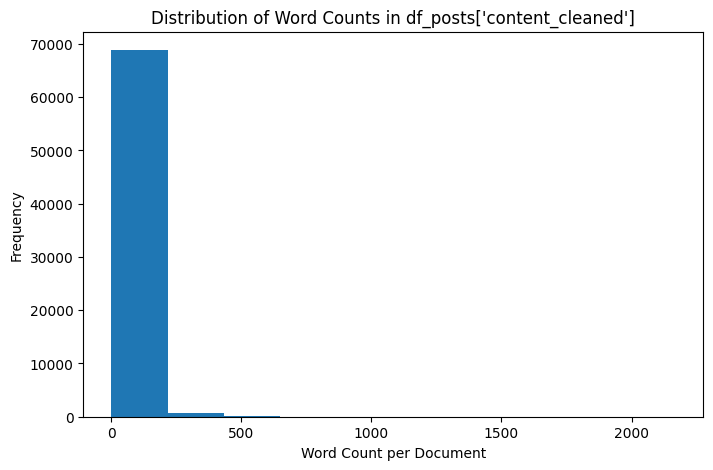

Lower Threshold (5th percentile): 4.0
Upper Threshold (95th percentile): 118.0


In [20]:
# Filter posts by word count by defining lower and upper treshold values to remove outliers in posts lengths
# min_words = 25
# max_words = 1000

# def word_count_filter(text):
#     count = len(text.split())
#     return min_words <= count <= max_words

# df_posts = df_posts[df_posts['content_cleaned'].apply(word_count_filter)]

# Create a word count column
df_posts["word_count"] = df_posts["content_cleaned"].apply(lambda x: len(str(x).split()))

# Plot histogram of word counts
plt.figure(figsize=(8, 5))
plt.hist(df_posts["word_count"])
plt.xlabel("Word Count per Document")
plt.ylabel("Frequency")
plt.title("Distribution of Word Counts in df_posts['content_cleaned']")
plt.show()

In [ ]:
# Compute recommended thresholds using quantiles
lower_threshold = df_posts["word_count"].quantile(0.10)
upper_threshold = df_posts["word_count"].quantile(0.95)

print("Lower Threshold (10th percentile):", lower_threshold)
print("Upper Threshold (95th percentile):", upper_threshold)

In [ ]:
\df_posts_backup = df_posts.copy()
df_posts = df_posts[
    (df_posts["word_count"] >= lower_threshold) &
    (df_posts["word_count"] <= upper_threshold)
]

In [21]:
# 12. Report corpus statistics
all_text = " ".join(df_posts['content_cleaned'])
all_words = all_text.split()
total_words = len(all_words)
unique_words = len(set(all_words))

In [22]:
print(f"Total words in cleaned corpus: {total_words}")
print(f"Unique words in cleaned corpus: {unique_words}") 

Total words in cleaned corpus: 2472366
Unique words in cleaned corpus: 70659


In [23]:
df_posts.head(20)

,type,source,keyword,id,author,subreddit,content,score,num_comments,parent_post,created_date,created_time,content_cleaned,word_count
0,post,new,no keyword,1otaemb,Cookiehere6969,srilanka,Is this a Scam or good investment? Haritha Lan...,2.0,1.0,no post,2025-11-10,10:33:16,scam good investment haritha lanka agarwood pl...,41
1,post,new,no keyword,1otaam5,oshan789,srilanka,Villa units for sale in Unawatuna Sri Lanka ! ...,3.0,0.0,no post,2025-11-10,10:26:02,villa unit sale unawatuna sri lanka new projec...,102
2,post,new,no keyword,1ot9w1v,mgssjjsks,srilanka,Whats your hot take on Sri Lanka as the title ...,3.0,8.0,no post,2025-11-10,10:00:29,what s hot take sri lanka title say gim one ho...,12
3,post,new,no keyword,1ot9kwe,Critical_Rise_exe,srilanka,Is the rs.11 deals real in Daraz?,1.0,3.0,no post,2025-11-10,09:40:57,rs11 deal real daraz,4
4,post,new,no keyword,1ot9h2f,No-Leave8971,srilanka,Need advice from the experts 🙏 [](https://www....,2.0,0.0,no post,2025-11-10,09:33:57,need advice expert folded_hand plan podcast fr...,75
5,post,new,no keyword,1ot9dyw,hotstar10,srilanka,Confusion Over Paddock Club Nugegoda’s Halal S...,0.0,4.0,no post,2025-11-10,09:28:19,confusion paddock club nugegoda halal status o...,41
6,post,new,no keyword,1ot9da2,prav_u,srilanka,Tour to Kanneliya Rain Forest I’m planning a g...,1.0,1.0,no post,2025-11-10,09:26:59,tour kanneliya rain forest I m plan group visi...,37
7,post,new,no keyword,1ot8r8a,Unusual-Witness-7304,srilanka,"ChatGPT vs electricians, my house wiring is no...",6.0,5.0,no post,2025-11-10,08:46:44,chatgpt vs electricians house wiring science e...,101
8,post,new,no keyword,1ot8lir,negative-impactr8888,srilanka,SLTMobitel changed the superuser router passwo...,3.0,0.0,no post,2025-11-10,08:36:16,sltmobitel change superuser router password tr...,57
9,post,new,no keyword,1ot8l95,Jakesbond007,srilanka,Can we hand carry medicine from abroad into Sr...,1.0,3.0,no post,2025-11-10,08:35:47,hand carry medicine abroad sri lanka hello med...,26


In [24]:
df_posts.shape

(69755, 14)

In [25]:
import unicodedata

def normalize_unicode(text):
    """
    Normalize unicode characters using NFKC.
    Converts full-width characters, combined characters, and compatibility characters 
    into a consistent canonical form.
    """
    return unicodedata.normalize("NFKC", text)

# Apply normalization
df_posts["content_cleaned"] = (
    df_posts["content_cleaned"]
    .astype(str)
    .apply(normalize_unicode)
)

In [26]:
df_posts.head(10)

,type,source,keyword,id,author,subreddit,content,score,num_comments,parent_post,created_date,created_time,content_cleaned,word_count
0,post,new,no keyword,1otaemb,Cookiehere6969,srilanka,Is this a Scam or good investment? Haritha Lan...,2.0,1.0,no post,2025-11-10,10:33:16,scam good investment haritha lanka agarwood pl...,41
1,post,new,no keyword,1otaam5,oshan789,srilanka,Villa units for sale in Unawatuna Sri Lanka ! ...,3.0,0.0,no post,2025-11-10,10:26:02,villa unit sale unawatuna sri lanka new projec...,102
2,post,new,no keyword,1ot9w1v,mgssjjsks,srilanka,Whats your hot take on Sri Lanka as the title ...,3.0,8.0,no post,2025-11-10,10:00:29,what s hot take sri lanka title say gim one ho...,12
3,post,new,no keyword,1ot9kwe,Critical_Rise_exe,srilanka,Is the rs.11 deals real in Daraz?,1.0,3.0,no post,2025-11-10,09:40:57,rs11 deal real daraz,4
4,post,new,no keyword,1ot9h2f,No-Leave8971,srilanka,Need advice from the experts 🙏 [](https://www....,2.0,0.0,no post,2025-11-10,09:33:57,need advice expert folded_hand plan podcast fr...,75
5,post,new,no keyword,1ot9dyw,hotstar10,srilanka,Confusion Over Paddock Club Nugegoda’s Halal S...,0.0,4.0,no post,2025-11-10,09:28:19,confusion paddock club nugegoda halal status o...,41
6,post,new,no keyword,1ot9da2,prav_u,srilanka,Tour to Kanneliya Rain Forest I’m planning a g...,1.0,1.0,no post,2025-11-10,09:26:59,tour kanneliya rain forest I m plan group visi...,37
7,post,new,no keyword,1ot8r8a,Unusual-Witness-7304,srilanka,"ChatGPT vs electricians, my house wiring is no...",6.0,5.0,no post,2025-11-10,08:46:44,chatgpt vs electricians house wiring science e...,101
8,post,new,no keyword,1ot8lir,negative-impactr8888,srilanka,SLTMobitel changed the superuser router passwo...,3.0,0.0,no post,2025-11-10,08:36:16,sltmobitel change superuser router password tr...,57
9,post,new,no keyword,1ot8l95,Jakesbond007,srilanka,Can we hand carry medicine from abroad into Sr...,1.0,3.0,no post,2025-11-10,08:35:47,hand carry medicine abroad sri lanka hello med...,26


# Tokenization

## Traditional Word-Based

In [27]:
# Tokenization

# -----------------------------
# 2.1 Word-level tokenizer + lemmatization + stopwords removal
# -----------------------------
def word_tokenizer(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

# -----------------------------
# 2.2 Prepare corpus for SentencePiece
# -----------------------------
corpus_file = "corpus.txt"
with open(corpus_file, "w", encoding="utf-8") as f:
    for t in df_posts["content_cleaned"]:
        f.write(t + "\n")

# -----------------------------
# 2.3 Train BPE tokenizer
# -----------------------------
spm.SentencePieceTrainer.Train(
    f"--input={corpus_file} --model_prefix=bpe --vocab_size=8000 --model_type=bpe"
)
bpe = spm.SentencePieceProcessor()
bpe.load("bpe.model")

# -----------------------------
# 2.4 Train Unigram LM tokenizer
# -----------------------------
spm.SentencePieceTrainer.Train(
    f"--input={corpus_file} --model_prefix=unigram --vocab_size=8000 --model_type=unigram"
)
unigram = spm.SentencePieceProcessor()
unigram.load("unigram.model")


True

In [28]:
# Word-level tokenizer

def word_tokenizer(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

In [29]:
df_posts["processed"] = df_posts["content_cleaned"].apply(word_tokenizer)

## Prepare corpus for SentencePiece

In [30]:
# Prepare corpus for SentencePiece
corpus_file = "corpus.txt"
with open(corpus_file, "w", encoding="utf-8") as f:
    for t in df_posts["content_cleaned"]:
        f.write(t + "\n")

### BPE Tokenizer

In [31]:
spm.SentencePieceTrainer.Train(
    f"--input={corpus_file} --model_prefix=bpe --vocab_size=8000 --model_type=bpe"
)
bpe = spm.SentencePieceProcessor()
bpe.load("bpe.model")

True

### Unigram tokenizer

In [32]:
spm.SentencePieceTrainer.Train(
    f"--input={corpus_file} --model_prefix=unigram --vocab_size=8000 --model_type=unigram"
)
unigram = spm.SentencePieceProcessor()
unigram.load("unigram.model")

True

## Compare Tokenization Schemes Impact using Corpus Statistics

Calculating:
- vocabulary size
- average tokens per document
- total tokens
- rare token frequency (<3 occurrences)
- OOV rate (for word-based tokenizers only)

In [33]:
# CORPUS STATISTICS PER TOKENIZER

def compute_stats(tokenizer_fn, tokenizer_name):
    all_tokens = []
    doc_lengths = []

    for text in df_posts["content_cleaned"]:
        tokens = tokenizer_fn(text)
        all_tokens.extend(tokens)
        doc_lengths.append(len(tokens))

    vocab = set(all_tokens)
    counter = collections.Counter(all_tokens)

    return {
        "Tokenizer": tokenizer_name,
        "Vocabulary Size": len(vocab),
        "Total Tokens": len(all_tokens),
        "Avg Tokens per Doc": sum(doc_lengths)/len(doc_lengths),
        "Rare Tokens (<3)": sum(1 for t,c in counter.items() if c < 3)
    }

stats_word = compute_stats(word_tokenizer, "Word+Lemmatization")
stats_bpe = compute_stats(lambda t: bpe.encode(t, out_type=str), "BPE")
stats_unigram = compute_stats(lambda t: unigram.encode(t, out_type=str), "Unigram LM")

stats_df = pd.DataFrame([stats_word, stats_bpe, stats_unigram])

NameError: name 'collections' is not defined

In [ ]:
stats_df

In [ ]:
# Set index to Tokenizer (for easier plotting)
plot_df = stats_df.set_index("Tokenizer")

# Plot each metric
plot_df.plot(kind="bar", figsize=(10,6))
plt.title("Comparison of Tokenizer Statistics")
plt.xlabel("Tokenizer")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# LSTM LANGUAGE MODEL

# -----------------------------
# 4.1 Dataset class
# -----------------------------
class LMDataset(Dataset):
    def __init__(self, token_ids, seq_len=30):
        self.seq_len = seq_len
        self.data = token_ids

    def __len__(self):
        return len(self.data) - self.seq_len

    def __getitem__(self, idx):
        x = torch.tensor(self.data[idx:idx+self.seq_len])
        y = torch.tensor(self.data[idx+1:idx+1+self.seq_len])
        return x, y

# -----------------------------
# 4.2 LSTM LM model
# -----------------------------
class LSTMLM(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, hidden_dim=256):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        e = self.embed(x)
        o, _ = self.lstm(e)
        return self.fc(o)

# -----------------------------
# 4.3 Training function
# -----------------------------
def train_lm(model, dataloader, epochs=2):
    model.train()
    optim = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        for x, y in tqdm(dataloader, desc=f"Epoch {epoch+1}"):
            optim.zero_grad()
            pred = model(x)
            loss = loss_fn(pred.view(-1, pred.size(-1)), y.view(-1))
            loss.backward()
            optim.step()
    return model

# -----------------------------
# 4.4 Perplexity
# -----------------------------
def perplexity(model, dataloader):
    model.eval()
    loss_fn = nn.CrossEntropyLoss(reduction='sum')
    total_loss, total_tokens = 0, 0

    with torch.no_grad():
        for x, y in dataloader:
            pred = model(x)
            loss = loss_fn(pred.view(-1, pred.size(-1)), y.view(-1))
            total_loss += loss.item()
            total_tokens += y.numel()

    return math.exp(total_loss / total_tokens)

In [ ]:
# TRAIN LSTMs PER TOKENIZER

SEQ, BATCH = 30, 32

# -------- Word-level ----------
word_vocab = {w:i for i,w in enumerate(set(itertools.chain.from_iterable(
    df_posts["content_cleaned"].apply(word_tokenizer)
)))}
word_id = lambda toks: [word_vocab[t] for t in toks if t in word_vocab]

word_ids = list(itertools.chain.from_iterable(
    df_posts["content_cleaned"].apply(word_tokenizer).apply(word_id)
))
word_dl = DataLoader(LMDataset(word_ids, SEQ), batch_size=BATCH)
lm_word = LSTMLM(len(word_vocab))
lm_word = train_lm(lm_word, word_dl)
pp_word = perplexity(lm_word, word_dl)

# -------- BPE ----------
bpe_ids = [i for t in df_posts["content_cleaned"] for i in bpe.encode(t)]
bpe_dl = DataLoader(LMDataset(bpe_ids, SEQ), batch_size=BATCH)
lm_bpe = LSTMLM(bpe.get_piece_size())
lm_bpe = train_lm(lm_bpe, bpe_dl)
pp_bpe = perplexity(lm_bpe, bpe_dl)

# -------- Unigram ----------
uni_ids = [i for t in df_posts["content_cleaned"] for i in unigram.encode(t)]
uni_dl = DataLoader(LMDataset(uni_ids, SEQ), batch_size=BATCH)
lm_uni = LSTMLM(unigram.get_piece_size())
lm_uni = train_lm(lm_uni, uni_dl)
pp_uni = perplexity(lm_uni, uni_dl)

In [ ]:
# FINAL COMPARISON TABLE

final_results = pd.DataFrame({
    "Tokenizer": ["Word+Lemmatization", "BPE", "Unigram"],
    "Vocabulary Size": [stats_word["Vocabulary Size"], stats_bpe["Vocabulary Size"], stats_unigram["Vocabulary Size"]],
    "Total Tokens": [stats_word["Total Tokens"], stats_bpe["Total Tokens"], stats_unigram["Total Tokens"]],
    "Avg Tokens per Doc": [stats_word["Avg Tokens per Doc"], stats_bpe["Avg Tokens per Doc"], stats_unigram["Avg Tokens per Doc"]],
    "Rare Tokens (<3)": [stats_word["Rare Tokens (<3)"], stats_bpe["Rare Tokens (<3)"], stats_unigram["Rare Tokens (<3)"]],
    "Perplexity": [pp_word, pp_bpe, pp_uni]
})
print(final_results)

## ✅ PIPELINE EXPLANATION

Phase 1 — Cleaning

Remove non-English posts

Normalize unicode

Remove URLs, emojis → text

Remove Reddit metadata, punctuation, stopwords

Lowercase & strip

Filter posts <25 or >1000 words

Phase 2 — Tokenization

Word-level + lemmatization

SentencePiece BPE

SentencePiece Unigram

Phase 3 — Corpus Statistics

Compute vocab size, total tokens, avg tokens/doc, rare tokens

Phase 4 — LSTM LM

Build LSTM language model

Train on each tokenization scheme

Phase 5 — Train LSTM + Perplexity

Compare model performance

Phase 6 — Final Table

Compare vocab, tokens, and perplexity

Recommend best tokenizer (likely BPE)